# Consensus Clustering

If you would like to access the data used in this example, please contact Jake Toffler (jake.toffler@gmail.com)

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import debacl as dcl
import networkx as nx

from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import distance

from itertools import cycle
from operator import itemgetter
from ggplot import *

/Users/jtoffler/anaconda/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/jtoffler/anaconda/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/jtoffler/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import plotly.plotly as py
import plotly.graph_objs as go

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode,  iplot, plot
init_notebook_mode(connected=True)

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
%matplotlib inline
plt.style.use('grayscale')

## Load Data

In [6]:
pitchers = pd.read_csv('~/Documents/USF/Practicum/AL Pitchers.csv')

In [7]:
def standardize(df, column_list):
    """
    This function takes a dataframe and a list of columns in that dataframe that should be standardized as input.  
    It returns the dataframe with the standardized columns as well as the stats needed to calculate original values. 
    """
    col_stats = []
    for col in column_list:
        col_mean_std = (df[col].mean(), df[col].std())
        col_stats.append(col_mean_std)
        df[col] = (df[col] - col_mean_std[0])/col_mean_std[1]
    return df, col_stats

In [8]:
clay = pitchers[pitchers['pitcher_name'] == 'Buchholz, Clay']
clay, stats = standardize(clay, ['initial_speed', 'break_x_full', 'break_z_full'])
clay['cluster_num'] = clay['cluster_num'].astype('object')

## Plots - No Color

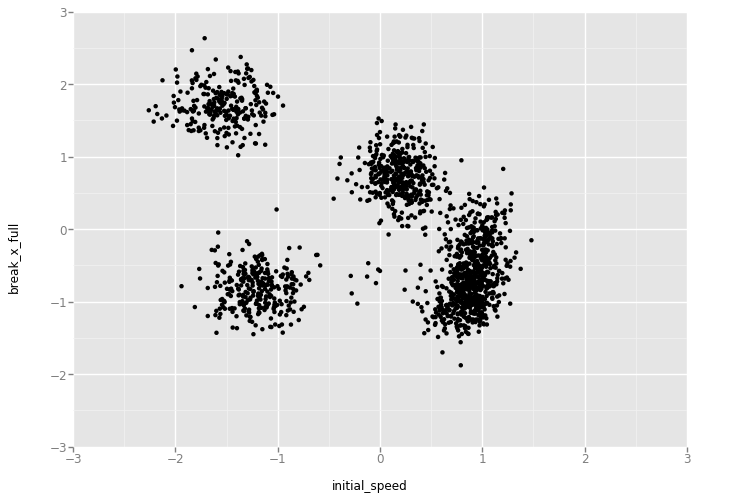

<ggplot: (281919881)>


In [9]:
print(ggplot(aes(x = 'initial_speed', y = 'break_x_full'), data = clay)\
+ geom_point()\
+ xlim(-3.0, 3.0)\
+ ylim(-3.0, 3.0)) 

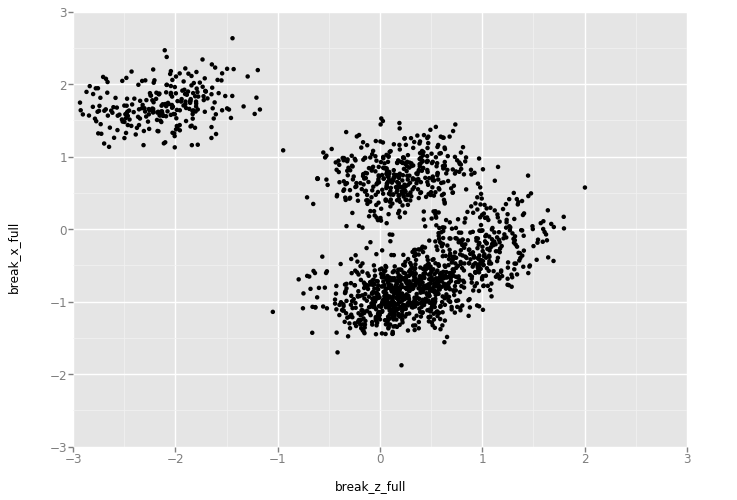

<ggplot: (288676121)>


In [10]:
print(ggplot(aes(x = 'break_z_full', y = 'break_x_full'), data = clay)\
+ geom_point()\
+ xlim(-3.0, 3.0)\
+ ylim(-3.0, 3.0)) 

## Plots - Color

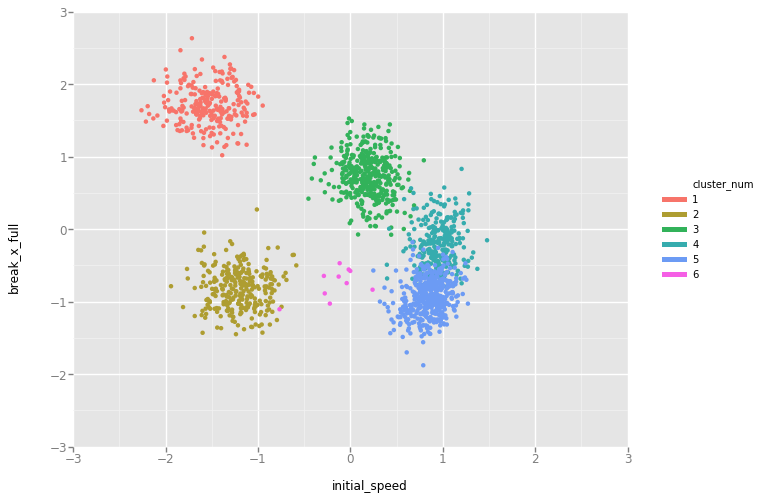

<ggplot: (288743973)>


In [16]:
print(ggplot(aes(x = 'initial_speed', y = 'break_x_full', color = 'cluster_num'), data = clay)\
+ geom_point()\
+ xlim(-3.0, 3.0)\
+ ylim(-3.0, 3.0))

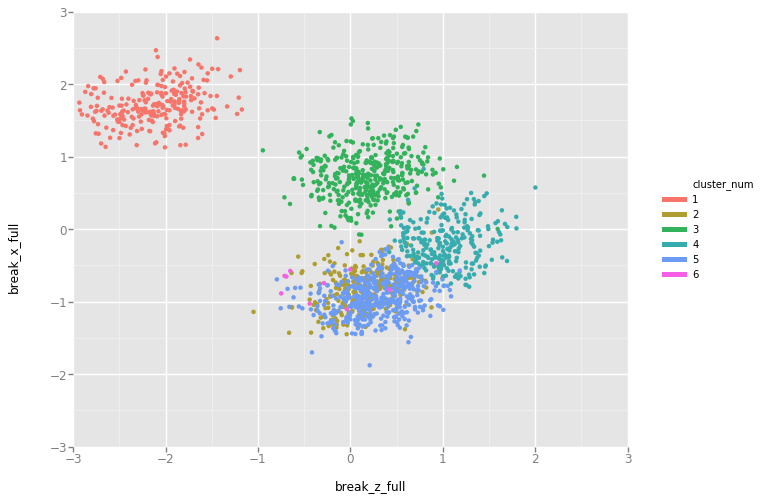

<ggplot: (288763245)>


In [17]:
print(ggplot(aes(x = 'break_z_full', y = 'break_x_full', color = 'cluster_num'), data = clay)\
+ geom_point()\
+ xlim(-3.0, 3.0)\
+ ylim(-3.0, 3.0)) 

## Clustering

### K-Means

Run K-Means for k=2 through k=10

In [18]:
potential_clusters = range(4,8)

In [19]:
possible_labels = []
for k in potential_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(clay[['initial_speed', 'break_x_full', 'break_z_full']])
    possible_labels.append(kmeans.labels_)

### Spectral Clustering

Run Spectral Clustering for k=2 through k=10

In [20]:
potential_clusters = range(4,8)

In [21]:
for k in potential_clusters:
    spectral = SpectralClustering(n_clusters=k).fit(clay[['initial_speed', 'break_x_full', 'break_z_full']])
    possible_labels.append(spectral.labels_)

/Users/jtoffler/anaconda/lib/python2.7/site-packages/sklearn/utils/graph.py:115: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



### DBSCAN

Run DBSCAN for eps 0.5 through 2.0 and for min_samples 5 through 20

In [22]:
eps = [0.3, 0.5]

In [23]:
min_samples = [5, 20]

In [24]:
for ep in eps:
    for sample in min_samples:
        db = DBSCAN(eps = ep, min_samples=sample).fit(clay[['initial_speed', 'break_x_full', 'break_z_full']])
        possible_labels.append(db.labels_)

## Adjacency Matrix

In [25]:
height = [0]*len(possible_labels[0])

In [26]:
adj = np.matrix([height]*len(height))

In [27]:
for label_set in possible_labels:
    for i in range(len(label_set.tolist())):
        for j in range(len(label_set.tolist())):
            if label_set[i] == label_set[j]:
                adj[i, j] += 1            

In [29]:
trace = go.Heatmap(z=adj)
data = [trace]
iplot(data, filename='basic_heatmap')